In [1]:
%matplotlib inline
import sys
sys.path.append("/Users/edwardlrichards/compAcoustics") 

import numpy as np
import pandas as pd
from makeEnv import acousticEnv
from normalMode import Chinook
from wni import Corgi

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
f = 45
sd = 36
c_w = 1500
rho_w = 1000
c_b = 1800
rho_b = 1800
atten_b = 0.2
d = 100

world = acousticEnv()
world.pekeris(c_w, c_b, rho_w, rho_b, atten_b, d)

In [3]:
zPlot = 46
rPlot = np.r_[10:8000:200j]

In [4]:
nm_model = Chinook(f, world)
nm_model.calculateModes_shooting()
p_nm = nm_model.calculatePressure(sd, zPlot, rPlot)
v_nm = nm_model.calculatePressure(sd, zPlot, rPlot, isPressure = False)

In [5]:
wni_model = Corgi(world, sd, f, zPlot, np.max(rPlot))
wni_model.integrateSpectrum()
p_wni = wni_model.getPressure()
v_wni = 1j * 2 * np.pi * f * wni_model.getDisplacement()

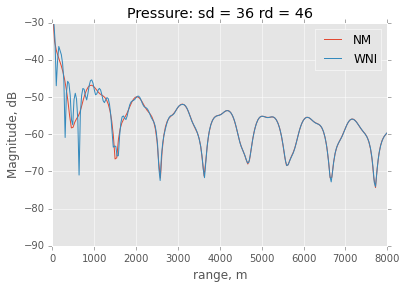

In [6]:
# Pressure comparison
_ = plt.plot(p_nm.index, 20 * np.log10(np.abs(p_nm)), label = 'NM')
_ = plt.plot(p_wni.index, 20 * np.log10(np.abs(p_wni)), label = 'WNI')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title('Pressure: sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

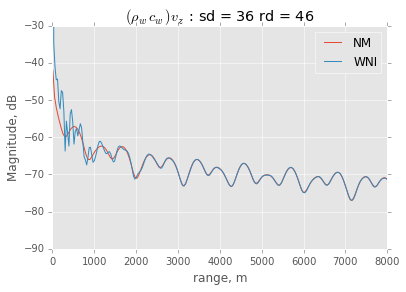

In [7]:
# Velocity comparison
_ = plt.plot(p_nm.index, 20 * np.log10(rho_w * c_w * np.abs(v_nm)),\
             label = 'NM')
_ = plt.plot(p_wni.index, 20 * np.log10(rho_w * c_w * np.abs(v_wni)),\
             label = 'WNI')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title(r'$(\rho_w c_w) v_z$ : sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

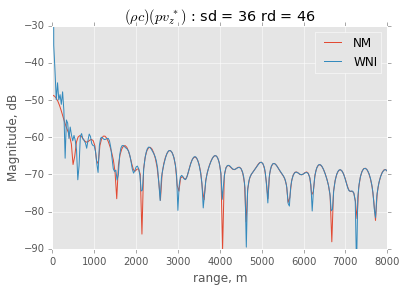

In [8]:
# Vertical Intensity comparison
_ = plt.plot(p_nm.index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_nm).conj() * p_nm))), label = 'NM')
_ = plt.plot(p_wni.index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni).conj() * p_wni))), label = 'WNI')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title(r'$(\rho c) (p v^*_z)$ : sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

In [9]:
# Calculate cuttoff frequencies
fRange = np.arange(40,400)
numCross = []
for f in fRange:
    nm_model = Chinook(f, world)
    numCross.append(nm_model.countNumberModes())
numCross = np.array(numCross)

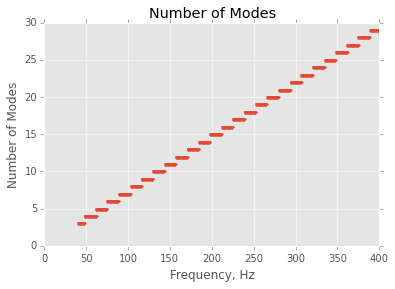

In [10]:
_ = plt.plot(fRange, numCross, '.')
_ = plt.title('Number of Modes')
_ = plt.xlabel('Frequency, Hz')
_ = plt.ylabel('Number of Modes')

In [11]:
crossing = np.diff(numCross)
crossingF = fRange[crossing == 1]

In [12]:
nm_model = Chinook(crossingF[0], world)
# print(nm_model.countNumberModes())
nm_model = Chinook(crossingF[0] + 1, world)
# print(nm_model.countNumberModes())

In [13]:
crossingI = 0
freqs = [crossingF[crossingI], crossingF[crossingI] + 1]

p_nm = []
v_nm = []

p_wni = []
v_wni = []


for f in freqs:
    nm_model = Chinook(f, world)
    nm_model.calculateModes_shooting()
    
    p_nm.append(nm_model.calculatePressure(sd, zPlot, rPlot))
    v_nm.append(nm_model.calculatePressure(sd, zPlot, rPlot, isPressure = False))
    
    wni_model = Corgi(world, sd, f, zPlot, np.max(rPlot))

    wni_model.integrateSpectrum()
    p_wni.append(wni_model.getPressure())
    v_wni.append(1j * 2 * np.pi * f * wni_model.getDisplacement())

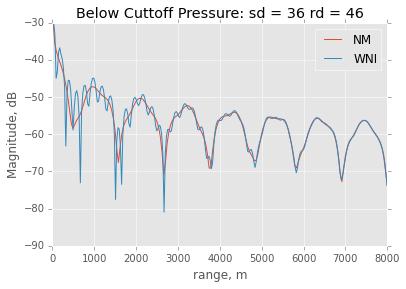

In [14]:
# Pressure comparison
_ = plt.plot(p_nm[0].index, 20 * np.log10(np.abs(p_nm[0])), label = 'NM')
_ = plt.plot(p_wni[0].index, 20 * np.log10(np.abs(p_wni[0])), label = 'WNI')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title('Below Cuttoff Pressure: sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

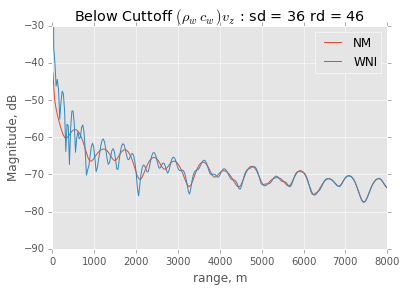

In [15]:
# Velocity comparison
_ = plt.plot(p_nm[0].index, 20 * np.log10(rho_w * c_w * np.abs(v_nm[0])),\
             label = 'NM')
_ = plt.plot(p_wni[0].index, 20 * np.log10(rho_w * c_w * np.abs(v_wni[0])),\
             label = 'WNI')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title(r'Below Cuttoff $(\rho_w c_w) v_z$ : sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

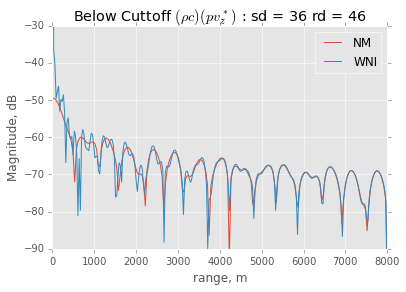

In [16]:
# Vertical Intensity comparison
_ = plt.plot(p_nm[0].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_nm[0]).conj() * p_nm[0]))), label = 'NM')
_ = plt.plot(p_wni[0].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[0]).conj() * p_wni[0]))), label = 'WNI')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title(r'Below Cuttoff $(\rho c) (p v^*_z)$ : sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

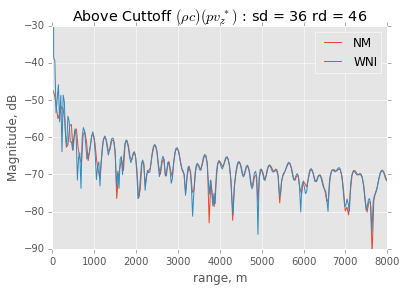

In [17]:
# Vertical Intensity comparison
_ = plt.plot(p_nm[1].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_nm[1]).conj() * p_nm[1]))), label = 'NM')
_ = plt.plot(p_wni[1].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[1]).conj() * p_wni[1]))), label = 'WNI')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title(r'Above Cuttoff $(\rho c) (p v^*_z)$ : sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

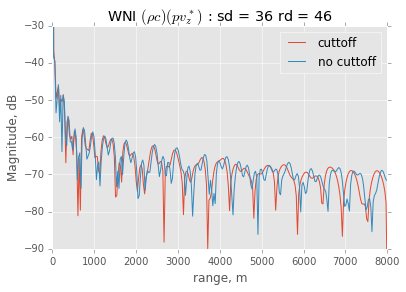

In [18]:
# Vertical Intensity comparison
_ = plt.plot(p_wni[0].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[0]).conj() * p_wni[0]))), label = 'cuttoff')
_ = plt.plot(p_wni[1].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_wni[1]).conj() * p_wni[1]))), label = 'no cuttoff')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title(r'WNI $(\rho c) (p v^*_z)$ : sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

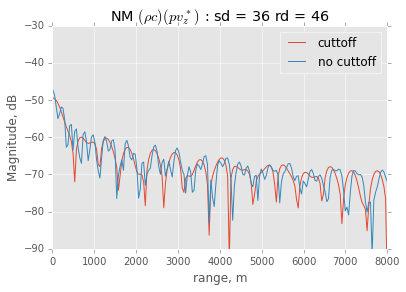

In [19]:
# Vertical Intensity comparison
_ = plt.plot(p_nm[0].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_nm[0]).conj() * p_nm[0]))), label = 'cuttoff')
_ = plt.plot(p_nm[1].index, 10 * np.log10(rho_w * c_w * 0.5 *\
        np.abs(np.real(np.array(v_nm[1]).conj() * p_nm[1]))), label = 'no cuttoff')
_ = plt.xlim([0, np.max(rPlot)])
_ = plt.ylim(-90, -30)
_ = plt.title(r'NM $(\rho c) (p v^*_z)$ : sd = ' + str(sd) +\
             ' rd = ' + str(zPlot))
_ = plt.xlabel('range, m')
_ = plt.ylabel('Magnitude, dB')
_ = plt.legend()

In [20]:
modeZ = np.r_[0:d:50j]

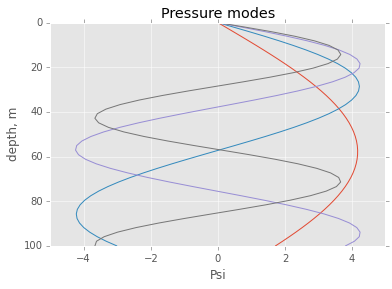

In [21]:
_ = plt.plot(nm_model.getPsi(modeZ, isPressure = True), modeZ)
_ = plt.ylim(d, 0)
_ = plt.title('Pressure modes')
_ = plt.ylabel('depth, m')
_ = plt.xlabel('Psi')

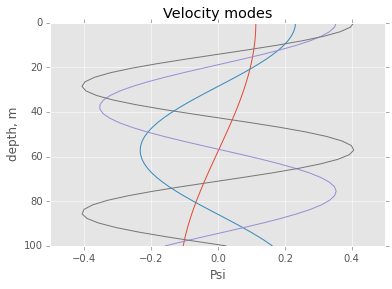

In [22]:
_ = plt.plot(nm_model.getPsi(modeZ, isPressure = False), modeZ)
_ = plt.ylim(d, 0)
_ = plt.title('Velocity modes')
_ = plt.ylabel('depth, m')
_ = plt.xlabel('Psi')